In [367]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [368]:
dataset = pd.read_csv(r'C:\Users\horne\Desktop\Only for this day\6.AI in Human Resource (HR)\HR_dataset.csv')

In [369]:
dataset.head()

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.333333,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463,1
1,0.133333,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0
2,0.000000,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859,0
3,0.000000,0.507347,0.555556,0.4,0.5,0.384615,0.309913,0.289758,0.440784,0
4,0.400000,0.662020,0.666667,0.7,0.5,0.461538,0.497929,0.397544,0.392760,1


In [370]:
null_columns = dataset.columns[dataset.isnull().any()].tolist()
null_columns

[]

In [371]:
X = dataset.iloc[ : , : -1]
y = dataset.iloc[: , -1 : ]

In [372]:
X.head()

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score
0,0.333333,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463
1,0.133333,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905
2,0.000000,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859
3,0.000000,0.507347,0.555556,0.4,0.5,0.384615,0.309913,0.289758,0.440784
4,0.400000,0.662020,0.666667,0.7,0.5,0.461538,0.497929,0.397544,0.392760


In [373]:
y.head()

,call_for_interview
0,1
1,0
2,0
3,0
4,1


In [374]:
from sklearn.model_selection import train_test_split

In [375]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

In [376]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

240
60
240
60


In [377]:
from sklearn.tree import DecisionTreeClassifier

In [378]:
DC = DecisionTreeClassifier(criterion = 'entropy' , splitter = 'random' , )

In [379]:
DC.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', splitter='random')

In [380]:
y_pred = DC.predict(X_test)

In [381]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[20,  2],
       [ 3, 35]], dtype=int64)

In [382]:
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, y_pred)
clf_report

'              precision    recall  f1-score   support\n\n           0       0.87      0.91      0.89        22\n           1       0.95      0.92      0.93        38\n\n    accuracy                           0.92        60\n   macro avg       0.91      0.92      0.91        60\nweighted avg       0.92      0.92      0.92        60\n'

In [383]:
from sklearn.tree import plot_tree

[Text(0.625, 0.95, 'x[0] <= 0.177\nentropy = 1.0\nsamples = 240\nvalue = [119, 121]'),
 Text(0.39285714285714285, 0.85, 'x[8] <= 0.563\nentropy = 0.482\nsamples = 125\nvalue = [112, 13]'),
 Text(0.35714285714285715, 0.75, 'x[2] <= 0.65\nentropy = 0.435\nsamples = 123\nvalue = [112, 11]'),
 Text(0.14285714285714285, 0.65, 'x[8] <= 0.381\nentropy = 0.281\nsamples = 82\nvalue = [78, 4]'),
 Text(0.07142857142857142, 0.55, 'x[3] <= 0.467\nentropy = 0.112\nsamples = 67\nvalue = [66, 1]'),
 Text(0.03571428571428571, 0.45, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0]'),
 Text(0.10714285714285714, 0.45, 'x[6] <= 0.175\nentropy = 0.323\nsamples = 17\nvalue = [16, 1]'),
 Text(0.07142857142857142, 0.35, 'x[6] <= 0.111\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.03571428571428571, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.10714285714285714, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.14285714285714285, 0.35, 'entropy = 0.0\nsamples = 14\nvalue = [14

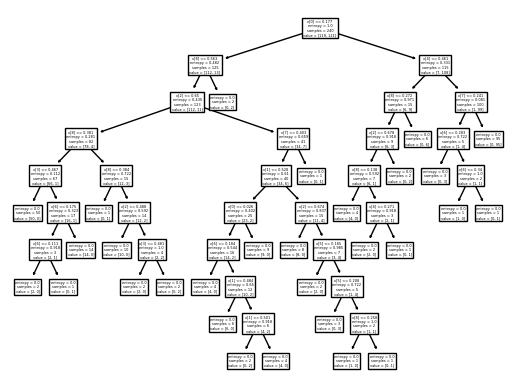

In [384]:
plot_tree(DC)

In [385]:
from sklearn.metrics import accuracy_score

In [386]:
accuracy_score(y_test, y_pred)

0.9166666666666666

In [387]:
from sklearn.model_selection import GridSearchCV

In [388]:
param_grid = {
    'criterion': ['gini', 'entropy' , 'log_loss'],
    'splitter' : ['best' , 'random']
}

In [389]:
grid_search = GridSearchCV(DecisionTreeClassifier() , param_grid , scoring='accuracy', cv = 10)

In [390]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [391]:
DC = grid_search.best_estimator_

In [392]:
grid_search.best_params_

{'criterion': 'log_loss', 'splitter': 'best'}

In [393]:
y_pred = DC.predict(X_test)

In [394]:
accuracy_score(y_test, y_pred)

0.8833333333333333

In [395]:
confusion_matrix(y_test , y_pred)

array([[19,  3],
       [ 4, 34]], dtype=int64)

In [396]:
from sklearn.ensemble import RandomForestClassifier

In [397]:
RF = RandomForestClassifier(n_estimators = 3 , criterion = 'entropy')

In [398]:
RF.fit(X_train , y_train)

C:\Users\horne\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', n_estimators=3)

In [399]:
y_pred = RF.predict(X_test)

In [400]:
confusion_matrix(y_test, y_pred)

array([[20,  2],
       [ 3, 35]], dtype=int64)

In [401]:
accuracy_score(y_pred , y_test)

0.9166666666666666

In [402]:
param_grid = {
    'n_estimators' : [3 , 5 , 10 , 25 , 50 , 75 , 100] ,
    'criterion': ['gini', 'entropy' , 'log_loss']
}

In [403]:
grid_search = GridSearchCV(RandomForestClassifier() , param_grid , scoring='accuracy', cv = 10)

In [404]:
grid_search.fit(X_train, y_train)

C:\Users\horne\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\horne\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\horne\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\horne\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed whe

C:\Users\horne\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\horne\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\horne\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\horne\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed whe

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [3, 5, 10, 25, 50, 75, 100]},
             scoring='accuracy')

In [405]:
RF = grid_search.best_estimator_

In [406]:
grid_search.best_params_

{'criterion': 'log_loss', 'n_estimators': 25}

In [407]:
y_pred = RF.predict(X_test)

In [408]:
accuracy_score(y_test, y_pred)

0.9

In [409]:
confusion_matrix(y_test , y_pred)

array([[20,  2],
       [ 4, 34]], dtype=int64)

In [410]:
from sklearn.svm import SVC

In [411]:
SVC_ = SVC()

In [412]:
SVC_.fit(X_train , y_train)

C:\Users\horne\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [413]:
y_pred = SVC_.predict(X_test)

In [414]:
accuracy_score(y_pred , y_test)

0.9333333333333333

In [415]:
confusion_matrix(y_pred , y_test)

array([[21,  3],
       [ 1, 35]], dtype=int64)

In [416]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 
    'degree': [2, 3, 4], 
    'gamma': ['scale', 'auto']
}

In [417]:
grid_search = GridSearchCV(SVC() , param_grid , scoring='accuracy', cv = 10)

In [418]:
grid_search.fit(X_train , y_train)

C:\Users\horne\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\horne\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\horne\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\horne\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was pass

C:\Users\horne\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\horne\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\horne\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\horne\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was pass

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [419]:
SVC_ = grid_search.best_estimator_

In [420]:
grid_search.best_params_

{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}

In [421]:
y_pred = SVC_.predict(X_test)

In [422]:
accuracy_score(y_pred , y_test)

0.9333333333333333

In [423]:
confusion_matrix(y_test , y_pred)

array([[21,  1],
       [ 3, 35]], dtype=int64)

In [424]:
from sklearn.neighbors import KNeighborsClassifier

In [425]:
KNN = KNeighborsClassifier(n_neighbors = 5)

In [426]:
KNN.fit(X_train , y_train)

C:\Users\horne\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [427]:
y_pred = KNN.predict(X_test)

In [428]:
confusion_matrix(y_pred , y_test)

array([[20,  3],
       [ 2, 35]], dtype=int64)

In [429]:
accuracy_score(y_pred , y_test)

0.9166666666666666

In [430]:
param_grid = {
    'n_neighbors': [3, 5, 7], 
    'weights': ['uniform', 'distance'], 
    'p': [1, 2]
}

In [431]:
grid_search = GridSearchCV(KNeighborsClassifier() , param_grid, scoring = 'accuracy', cv = 10)

In [432]:
grid_search.fit(X_train, y_train)

C:\Users\horne\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\horne\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\horne\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\horne\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was

C:\Users\horne\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\horne\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\horne\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\horne\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [433]:
grid_search.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

In [434]:
KNN = grid_search.best_estimator_

In [435]:
y_pred = KNN.predict(X_test)

In [436]:
accuracy_score(y_test, y_pred)

0.9333333333333333

In [437]:
confusion_matrix(y_test , y_pred)

array([[21,  1],
       [ 3, 35]], dtype=int64)